<a href="https://colab.research.google.com/github/eckoecho/JupyterNotebooks/blob/main/Peer_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TW Peer Review Data
**Problem**: This notebook will analyze TW Peer Review comments for the past year. We have been running the peer review process for a year, so it would be interesting to apply some overall analyses to the data. It attempts to look at patterns and see if we are improving over time or if certain themes are consistent over the past year. This analysis can help to determine the effectiveness of peer review and how it could be improved.

## Obtaining the Data
An initial file was downloaded from Asana in CSV format. This file was obtained by running a simple search on all tasks with the `Peer Review` tag. This report provides a lot of information about each task; however, you cannot extract comments from it. I used the Asana API to pull in some comments.

In [ ]:
# Import pandas to manage the csv file and import the Asana API.
import pandas as pd
import asana

In [ ]:
# Bring in original data
df = pd.read_csv('data.csv')

In [ ]:
# Access the Task ID column in the dataframe for use with the API. Returns a list of IDs.
id_list = df['Task ID'].tolist()
print(id_list)

[1202557831427664, 1202529705403327, 1202527444009576, 1202517179145505, 1202509992142980, 1202490453319995, 1202485336789566, 1202466462268890, 1202465952456213, 1202465892152824, 1202422624543865, 1202419636944203, 1202419636911580, 1202419634775528, 1202415044913104, 1202399390572174, 1202391595802895, 1202391316737987, 1202358567217308, 1202358567104919, 1202358565232049, 1202358565595563, 1202358565528169, 1202358565200553, 1202341980340550, 1202341932963240, 1202341972015768, 1202341971918157, 1202341971013853, 1202341880263362, 1202314166468843, 1202314255478827, 1202314255393864, 1202314254951801, 1202306666811715, 1202306594396582, 1202306265089856, 1202306165200837, 1202298838154870, 1202298702689718, 1202298750584573, 1202298702559296, 1202288268179133, 1202286019966150, 1202271234425667, 1202271187034821, 1202270493088408, 1202263144079785, 1202263093422802, 1202263048840148, 1202263048793759, 1202263091880139, 1202263033382402, 1202261361991631, 1202260188924192, 120224993

In [ ]:
# Establish Asana connection
import config
personal_access_token = config.access_token
client = asana.Client.access_token(personal_access_token)

In [ ]:
# Comments are stored as a story with the subtype of comment_added. Pull individual comment_added. Data returned as an array of generators.
all_stories = []
for i in id_list:
    stories = client.stories.get_stories_for_task(str(i), opt_pretty=True)
    all_stories.append(stories)
    print(all_stories)

In [ ]:
# Getting comments that contain the words "peer review." This may not be every single peer reviwed comment, but it's the only way to really
# parse the list and get a decent sample. Then, add results to a dictionary with the date the comment was made.
pr_comment = {"Date":[],"Comment":[]}
for j in all_stories:
    for i in j:
        if i['resource_subtype'] == 'comment_added':
            if 'peer review' in i['text']:
                print(i['text'])
                pr_comment["Date"].append(str(i['created_at']))
                pr_comment["Comment"].append(str(i['text']))
            elif 'Peer Review' in i['text']:
                print(i['text'])
                pr_comment["Date"].append(str(i['created_at']))
                pr_comment["Comment"].append(str(i['text']))


In [ ]:
# Create csv from dictionary
df = pd.DataFrame.from_dict(pr_comment) 
df.to_csv (r'peer_review_comments.csv', index = False, header=True)

The resulting csv contains two columns: date and comment. No other information was added in order to keep this analysis deidentified and something that is done at the team level. Some writers' names are contained in the comments, but this can be removed if needed when analyzing. 

I ended up removing the date column and creating a "cleaned" file for use when analyzing. I used the date column to also split the file into quarters and create separate quarterly files. 

## Data Analysis for the Whole Year
I will use the `nltk` package to perform keyword extraction and create a word cloud visualization. The text corpus contains a number of words that can be removed for further analysis.

In [ ]:
# Load the exported data file for all data
filename = 'pr_comments_clean.csv'
file = open(filename, 'rt')
all_data = file.read()
file.close()

### Clean the Data
This function uses the `nltk` package to clean the data by tokenizing the words, making the words lowercase, and filterning stopwords.

In [ ]:
def clean_data(data):
    # Split into words
    from nltk.tokenize import word_tokenize
    tokens = word_tokenize(data)
    # Convert to lowercase
    tokens = [w.lower() for w in tokens]
    # Remove punctuation from each word
    import string
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # Remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # Filter out stop words
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    other_words = ["peer", "review", "like", "internal", "feedback", "slide", "https", "think", "might", "would", "one", "since", "nt", "notes"]
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if not w in other_words]
    return words



Run the function:

In [ ]:
all_pr = clean_data(all_data)

## Word Cloud Function
This function generates a word cloud for the entire dataset ([StackOverflow source](https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python)). This word cloud represents the most common themes for the past year.

In [ ]:
# Make a word cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()



## Word Cloud Representing the Whole Year
Run the function:

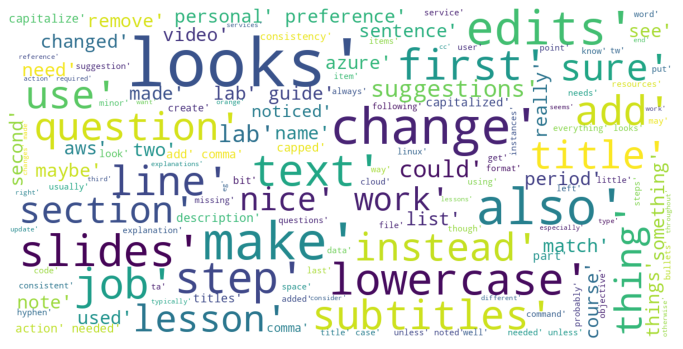

In [ ]:
show_wordcloud(all_pr)

### Frequencies for the Whole Year

In [ ]:
def get_counts(df):
    df = pd.DataFrame(df)
    return df.groupby(df[0])[0].count().sort_values(0, ascending=False).reset_index(name="Count").head(20)

In [ ]:
df_all = get_counts(pd.DataFrame(all_pr))
df_all

/var/folders/9k/83nvv3c57r13xp8hn34dnrk40000gp/T/ipykernel_4504/4227951355.py:3: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  return df.groupby(df[0])[0].count().sort_values(0, ascending=False).reset_index(name="Count").head(20)


,0,Count
0,looks,373
1,edits,173
2,add,163
3,change,163
4,make,160
5,text,156
6,title,145
7,work,144
8,comma,144
9,also,142


From the output, you can see some common themes:
- Capitalization (e.g, `lowercase`, `capitalize`, `capped`). This could have to do with titles, capitalizing vendor objects, or making common nouns lowercase.
- Writers often suggest things based on `personal preference`.
- `subtitles` come up often, which makes it seem like a lot of comments had to do with subtitles.
- `title` is also commmon, which could be related to capitalization.

## Quarterly Analysis
I want to see if these themes are consistent or vary across quarter. Do we see the same issues in July 2021 that we do know? 

### First Quarter
This data will represent July 2021–October 2021.

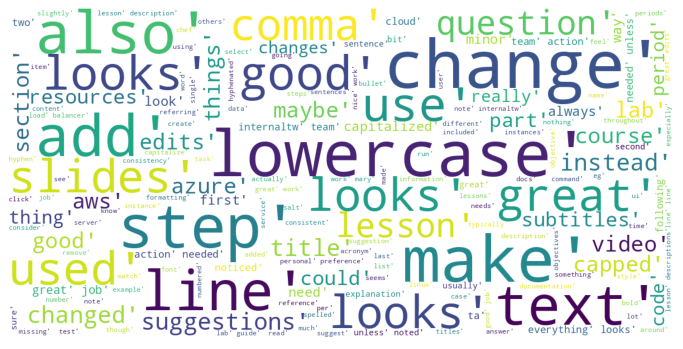

/var/folders/9k/83nvv3c57r13xp8hn34dnrk40000gp/T/ipykernel_4504/4227951355.py:3: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  return df.groupby(df[0])[0].count().sort_values(0, ascending=False).reset_index(name="Count").head(20)


,0,Count
0,looks,107
1,great,83
2,good,65
3,line,52
4,change,48
5,lesson,46
6,work,44
7,make,43
8,lowercase,42
9,text,40


In [ ]:
# Load and analyze Q1
filename = 'pr_comments_q1.csv'
file = open(filename, 'rt')
q1 = file.read()
file.close()
clean_q1 = clean_data(q1)
show_wordcloud(clean_q1)
df_q1 = get_counts(clean_q1)
df_q1


### Q2 Analysis (October–January)

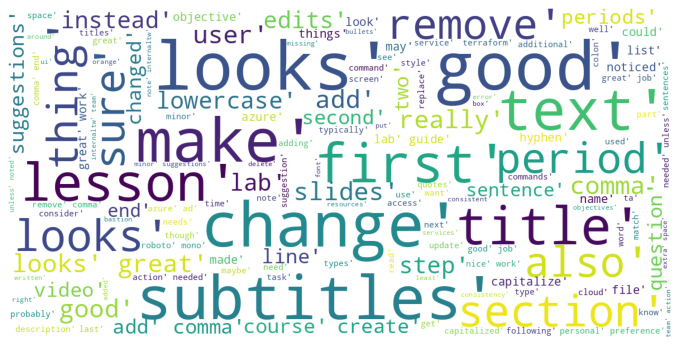

/var/folders/9k/83nvv3c57r13xp8hn34dnrk40000gp/T/ipykernel_4504/4227951355.py:3: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  return df.groupby(df[0])[0].count().sort_values(0, ascending=False).reset_index(name="Count").head(20)


,0,Count
0,looks,105
1,good,80
2,great,67
3,comma,65
4,add,43
5,text,42
6,change,40
7,work,39
8,make,38
9,remove,38


In [ ]:
# Load and analyze Q2
filename = 'pr_comments_q2.csv'
file = open(filename, 'rt')
q2 = file.read()
file.close()
clean_q2 = clean_data(q2)
show_wordcloud(clean_q2)
df_q2 = get_counts(clean_q2)
df_q2

### Q3 Analysis (January–April)

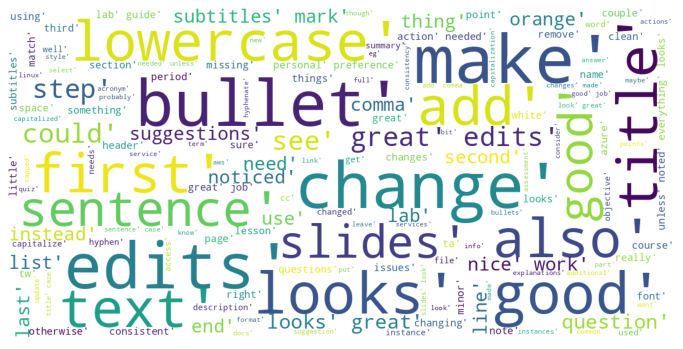

/var/folders/9k/83nvv3c57r13xp8hn34dnrk40000gp/T/ipykernel_4504/4227951355.py:3: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  return df.groupby(df[0])[0].count().sort_values(0, ascending=False).reset_index(name="Count").head(20)


,0,Count
0,great,75
1,looks,74
2,good,63
3,edits,55
4,title,47
5,add,38
6,make,36
7,text,35
8,sentence,35
9,work,35


In [ ]:
# Load and analyze Q3
filename = 'pr_comments_q3.csv'
file = open(filename, 'rt')
q3 = file.read()
file.close()
clean_q3 = clean_data(q3)
show_wordcloud(clean_q3)
df_q3 = get_counts(clean_q3)
df_q3

### Q4 Analysis (April–July)

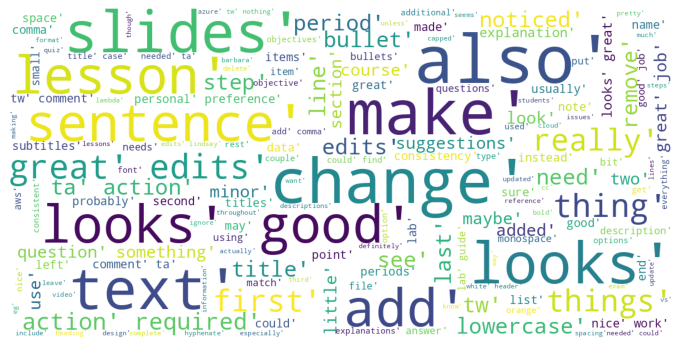

/var/folders/9k/83nvv3c57r13xp8hn34dnrk40000gp/T/ipykernel_4504/4227951355.py:3: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  return df.groupby(df[0])[0].count().sort_values(0, ascending=False).reset_index(name="Count").head(20)


,0,Count
0,looks,87
1,great,86
2,good,65
3,edits,63
4,ta,51
5,also,51
6,add,49
7,tw,47
8,make,43
9,change,43


In [ ]:
# Load and analyze Q4
filename = 'pr_comments_q4.csv'
file = open(filename, 'rt')
q4 = file.read()
file.close()
clean_q4 = clean_data(q4)
show_wordcloud(clean_q4)
df_q4 = get_counts(clean_q4)
df_q4